Inisialisasi & Konfigurasi

In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from matplotlib.ticker import FuncFormatter

load_dotenv()

# CSV Path
dataFrame = pd.read_csv('B:\GitHub Repository\Automated-Crypto-Market-Insights\cleaning\cleaned_data.csv',)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [2]:
dataFrame

,id,name,symbol,cmc_rank,price,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,last_updated_utc+0,timestamp_utc+0
0,1,Bitcoin,BTC,1,118251.148582,6.351810e+10,2.353120e+12,0.180263,-0.511674,0.066370,2025-07-30 09:21:00+00:00,2025-07-30 09:22:49+00:00
1,1,Bitcoin,BTC,1,118222.548598,6.336142e+10,2.352551e+12,0.108250,-0.552733,0.077521,2025-07-30 09:27:00+00:00,2025-07-30 09:28:48+00:00
2,1,Bitcoin,BTC,1,118085.282038,6.337359e+10,2.349820e+12,-0.016901,-0.658436,-0.004843,2025-07-30 09:34:00+00:00,2025-07-30 09:34:49+00:00
3,1,Bitcoin,BTC,1,118026.710620,6.332987e+10,2.348654e+12,-0.161087,-0.649496,-0.125019,2025-07-30 09:39:00+00:00,2025-07-30 09:40:48+00:00
4,1,Bitcoin,BTC,1,118048.130320,6.332775e+10,2.349082e+12,-0.260655,-0.708079,-0.107081,2025-07-30 09:46:00+00:00,2025-07-30 09:46:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
45094,36507,Pump.fun,PUMP,73,0.002912,3.732140e+08,1.030796e+09,-1.136576,5.681448,11.046915,2025-08-03 23:56:00+00:00,2025-08-03 23:59:14+00:00
45095,36507,Pump.fun,PUMP,73,0.002917,3.695090e+08,1.032762e+09,-0.863916,5.605157,11.562059,2025-08-04 00:03:00+00:00,2025-08-04 00:04:51+00:00
45096,36507,Pump.fun,PUMP,73,0.002917,3.682975e+08,1.032560e+09,-0.992966,4.827386,11.425244,2025-08-04 00:08:00+00:00,2025-08-04 00:10:50+00:00
45097,36507,Pump.fun,PUMP,73,0.002904,3.639031e+08,1.028099e+09,-0.831043,4.931752,11.085796,2025-08-04 00:14:00+00:00,2025-08-04 00:16:50+00:00


Menggunakan data terbaru per koin untuk analisis.

--- ANALISIS PERSENTASE PERUBAHAN HARGA 24 JAM ---

📈 Top 5 Gainers (Perubahan 24 Jam):
  Ethena (ENA): 13.31% 📈
  Conflux (CFX): 11.89% 📈
  Stellar (XLM): 8.41% 📈
  Algorand (ALGO): 7.73% 📈
  Hedera (HBAR): 7.49% 📈

📉 Top 5 Losers (Perubahan 24 Jam):
  BitTorrent [New] (BTT): -1.41% 📉
  Tether Gold (XAUt): -0.11% 📉
  PAX Gold (PAXG): -0.07% 📉
  PayPal USD (PYUSD): -0.00% 📉
  Dai (DAI): 0.00% 📉


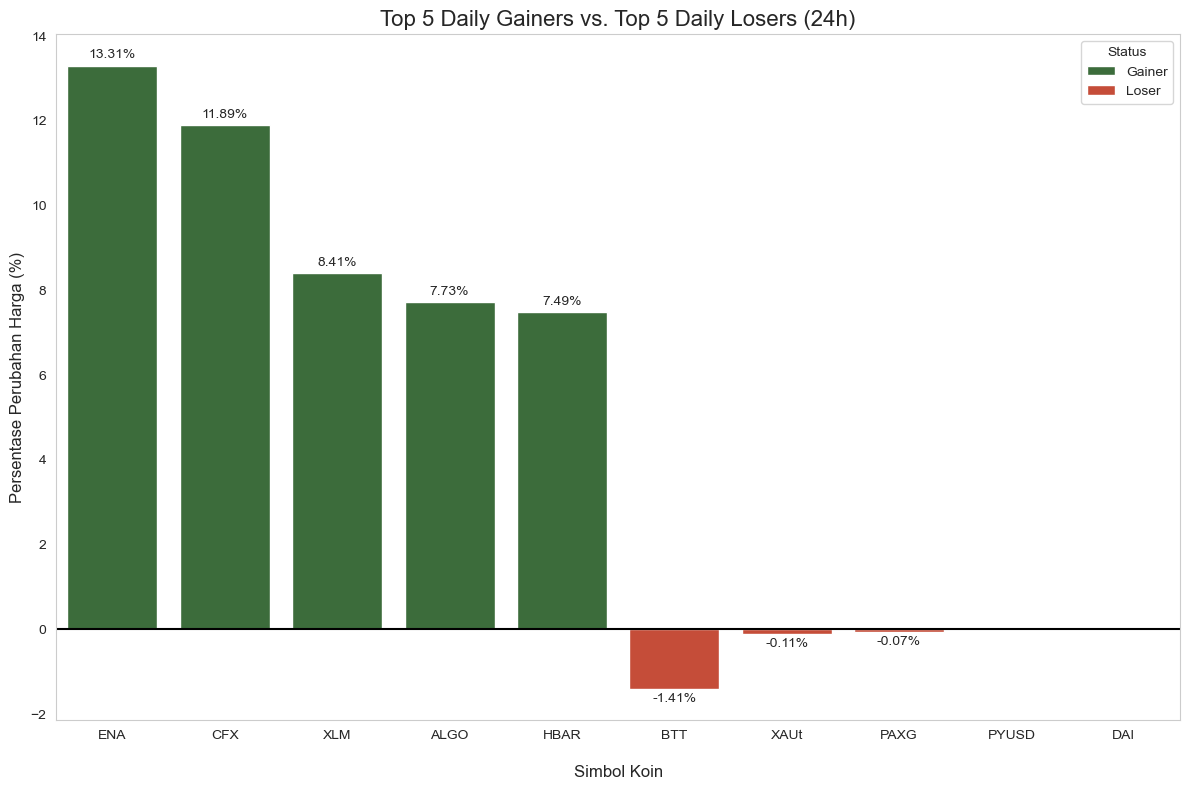

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'dataFrame' sudah dimuat di sini.
# Jika Anda tidak memiliki dataFrame, contohnya bisa seperti berikut:
# data = {'id': ['bitcoin', 'ethereum', 'dogecoin', 'solana', 'xrp', 'tether', 'cardano', 'shiba-inu', 'polkadot', 'litecoin'],
#         'name': ['Bitcoin', 'Ethereum', 'Dogecoin', 'Solana', 'XRP', 'Tether', 'Cardano', 'Shiba Inu', 'Polkadot', 'Litecoin'],
#         'symbol': ['BTC', 'ETH', 'DOGE', 'SOL', 'XRP', 'USDT', 'ADA', 'SHIB', 'DOT', 'LTC'],
#         'percent_change_24h': [1.5, 2.1, -5.2, 7.8, -1.1, 0.05, -3.4, 12.5, 0.9, -2.5],
#         'timestamp_utc+0': ['2025-07-31T10:00:00Z']*10}
# dataFrame = pd.DataFrame(data)

# Pastikan 'latest_data' tersedia dari sel analisis korelasi sebelumnya.
# Jika Anda tidak menjalankan sel korelasi, Anda bisa membuat 'latest_data' seperti ini:
if 'timestamp_utc+0' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp_utc+0'].idxmax()].copy()
    print("Menggunakan data terbaru per koin untuk analisis.")
else:
    latest_data = dataFrame.copy()
    print("Kolom 'timestamp_utc+0' tidak ditemukan, menggunakan semua data dalam DataFrame.")


# --- 1. Top 5 Gainers dan Losers (percent_change_24h) ---
print("\n--- ANALISIS PERSENTASE PERUBAHAN HARGA 24 JAM ---")

if 'percent_change_24h' in latest_data.columns:
    # Hapus baris dengan nilai NaN di 'percent_change_24h' agar tidak mengganggu sorting
    filtered_data = latest_data.dropna(subset=['percent_change_24h']).copy()

    # Top 5 Gainers (persentase terbesar)
    top_gainers = filtered_data.sort_values(by='percent_change_24h', ascending=False).head(5).copy()
    top_gainers['status'] = 'Gainer'

    # Top 5 Losers (persentase terkecil, yaitu paling negatif)
    top_losers = filtered_data.sort_values(by='percent_change_24h', ascending=True).head(5).copy()
    top_losers['status'] = 'Loser'

    print("\n📈 Top 5 Gainers (Perubahan 24 Jam):")
    for index, row in top_gainers.iterrows():
        print(f"  {row['name']} ({row['symbol']}): {row['percent_change_24h']:.2f}% 📈")

    print("\n📉 Top 5 Losers (Perubahan 24 Jam):")
    for index, row in top_losers.iterrows():
        print(f"  {row['name']} ({row['symbol']}): {row['percent_change_24h']:.2f}% 📉")

    # --- Visualisasi Bar Chart ---
    # Gabungkan data gainers dan losers untuk visualisasi tunggal
    combined_data = pd.concat([top_gainers, top_losers])
    
    # Urutkan ulang data untuk visualisasi yang lebih baik
    # Pastikan 'symbol' adalah kategori agar urutan tidak diacak
    combined_data['symbol'] = pd.Categorical(
        combined_data['symbol'], 
        categories=combined_data['symbol'], 
        ordered=True
    )

    plt.figure(figsize=(12, 8))
    
    # Tentukan palet warna kustom sesuai permintaan
    custom_palette = {'Gainer': '#347433', 'Loser': '#DC3C22'}
    
    # Buat bar plot dengan warna yang ditentukan
    ax = sns.barplot(
        x='symbol', 
        y='percent_change_24h', 
        hue='status', 
        data=combined_data, 
        palette=custom_palette, 
        dodge=False,
        order=combined_data['symbol']
    )
    
    # Tambahkan nilai persentase pada setiap bar
    for p in ax.patches:
        height = p.get_height()
        # Hilangkan label jika nilai mendekati nol
        if abs(height) > 0.01:
            if height >= 0:
                ax.text(p.get_x() + p.get_width() / 2., 
                        height + 0.1, # Posisi teks sedikit di atas bar
                        '{:1.2f}%'.format(height), 
                        ha='center', 
                        va='bottom',
                        fontsize=10)
            else:
                ax.text(p.get_x() + p.get_width() / 2., 
                        height - 0.1, # Posisi teks sedikit di bawah bar
                        '{:1.2f}%'.format(height), 
                        ha='center', 
                        va='top',
                        fontsize=10)
    
    # Hapus semua grid, lalu tambahkan garis horizontal di y=0
    ax.grid(False)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

    plt.title('Top 5 Daily Gainers vs. Top 5 Daily Losers (24h)', fontsize=16)
    plt.xlabel('\nSimbol Koin', fontsize=12)
    plt.ylabel('Persentase Perubahan Harga (%)', fontsize=12)
    plt.xticks(rotation=0) # Rotasi label sumbu x agar tidak bertumpuk
    plt.legend(title='Status', loc='upper right')
    plt.tight_layout()
    plt.show()

else:
    print("Kolom 'percent_change_24h' tidak ditemukan di DataFrame Anda.")


ANALISIS VOLUME PER JAM BITCOIN & ETHEREUM (ALTCOIN)

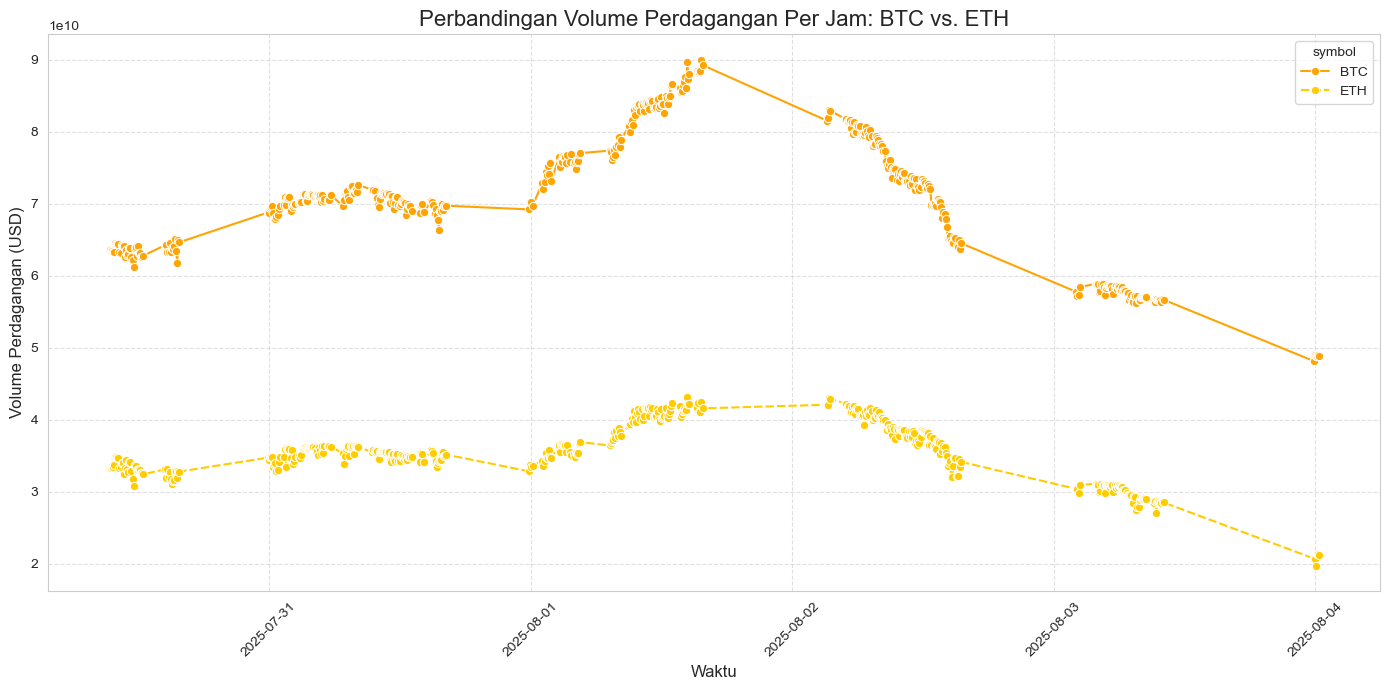

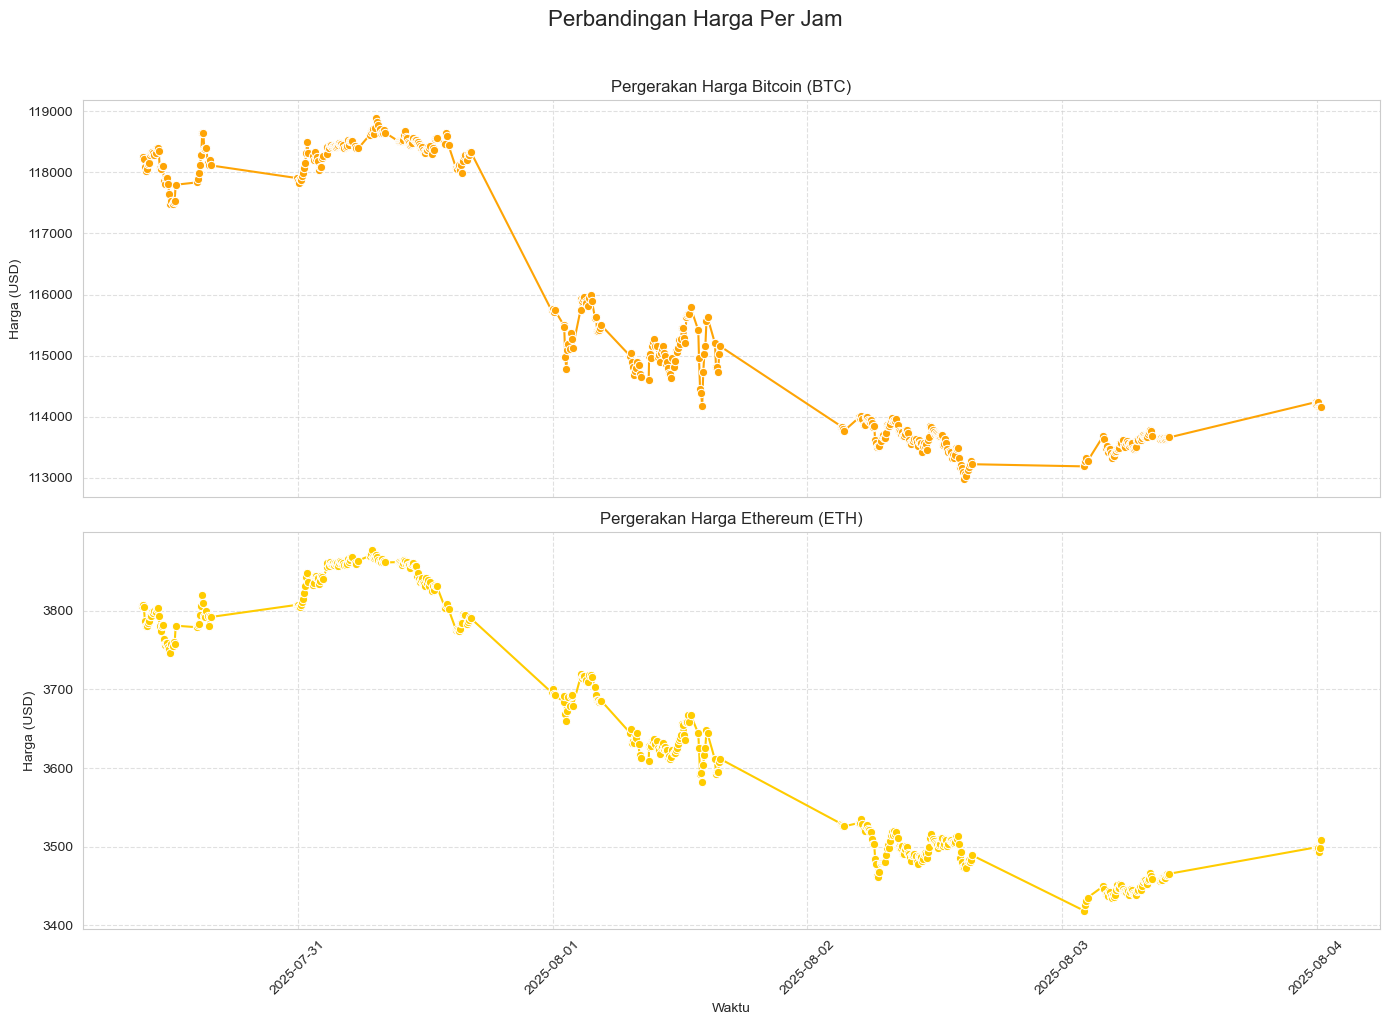

In [4]:
btc_eth_data = dataFrame[dataFrame['symbol'].isin(['BTC', 'ETH'])].copy()

# Pastikan kolom waktu berformat datetime dan atur sebagai index
btc_eth_data['timestamp'] = pd.to_datetime(btc_eth_data['timestamp_utc+0'])
btc_eth_data.set_index('timestamp', inplace=True)

# Visualisasi 1: Perbandingan volume per jam dengan line chart
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=btc_eth_data,
    x='timestamp',
    y='volume_24h',
    hue='symbol',
    style='symbol',
    palette={'BTC': '#FEA405', 'ETH': '#FFCC00'},
    marker='o'
)
plt.title('Perbandingan Volume Perdagangan Per Jam: BTC vs. ETH', fontsize=16)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Volume Perdagangan (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualisasi 2 & 3: Perbandingan harga per jam dengan dua plot terpisah
# Buat figure dan axes untuk dua subplot
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Perbandingan Harga Per Jam', fontsize=16, y=1.02)

# Subplot untuk Bitcoin
sns.lineplot(
    data=btc_eth_data[btc_eth_data['symbol'] == 'BTC'],
    x='timestamp',
    y='price',
    color='#FEA405',
    marker='o',
    ax=axes[0]
)
axes[0].set_title('Pergerakan Harga Bitcoin (BTC)')
axes[0].set_ylabel('Harga (USD)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Subplot untuk Ethereum
sns.lineplot(
    data=btc_eth_data[btc_eth_data['symbol'] == 'ETH'],
    x='timestamp',
    y='price',
    color='#FFCC00',
    marker='o',
    ax=axes[1]
)
axes[1].set_title('Pergerakan Harga Ethereum (ETH)')
axes[1].set_ylabel('Harga (USD)')
axes[1].set_xlabel('Waktu')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- ANALISIS VOLATILITAS 10 KOIN TERTINGGI ---
Kolom 'high_24h' atau 'low_24h' tidak ditemukan. Menggunakan 'percent_change_24h' sebagai proxy.


C:\Users\Asus\AppData\Local\Temp\ipykernel_13052\2134174414.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


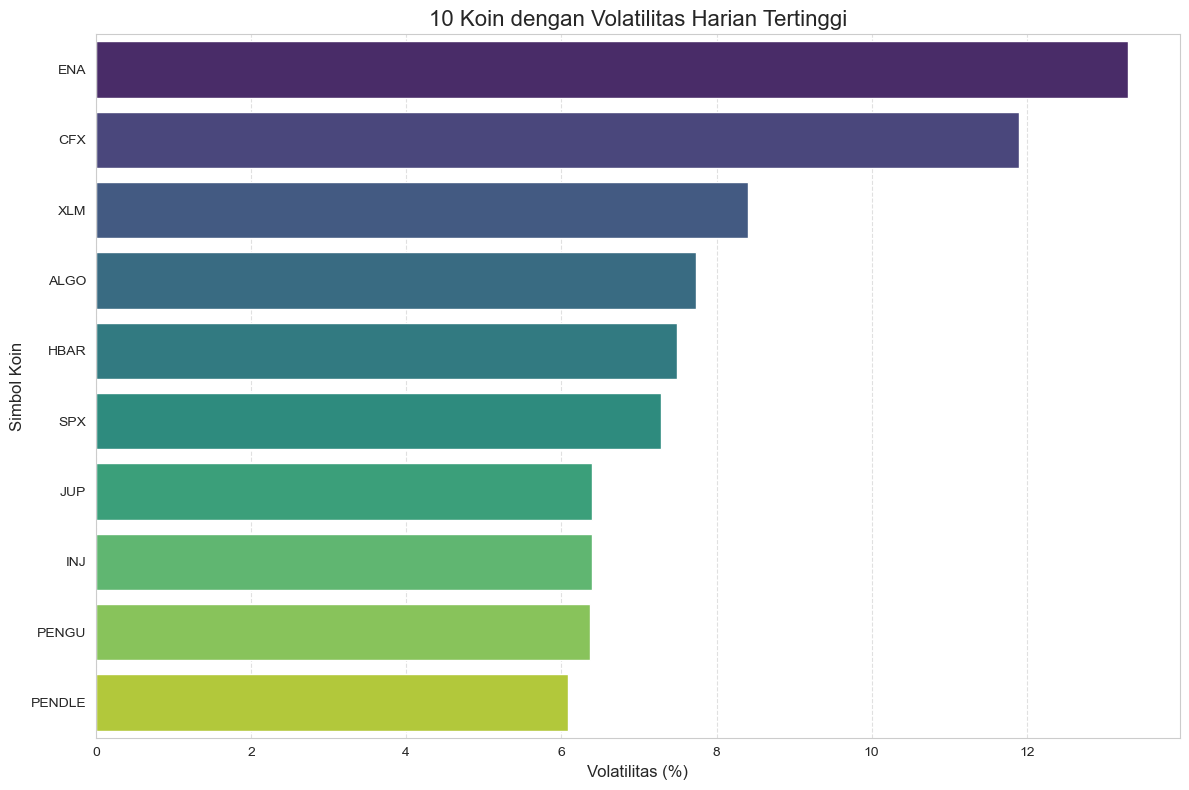

In [5]:
print("\n--- ANALISIS VOLATILITAS 10 KOIN TERTINGGI ---")

# Pastikan hanya menggunakan data terbaru per koin
if 'timestamp_utc+0' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp_utc+0'].idxmax()].copy()
else:
    latest_data = dataFrame.copy()

# Cek apakah kolom 'high_24h' dan 'low_24h' tersedia
if 'high_24h' in latest_data.columns and 'low_24h' in latest_data.columns:
    # Hitung volatilitas sebagai persentase dari harga rendah ke harga tinggi
    latest_data['volatility_percent'] = ((latest_data['high_24h'] - latest_data['low_24h']) / latest_data['low_24h']) * 100
else:
    print("Kolom 'high_24h' atau 'low_24h' tidak ditemukan. Menggunakan 'percent_change_24h' sebagai proxy.")
    latest_data['volatility_percent'] = abs(latest_data['percent_change_24h'])

# Urutkan berdasarkan volatilitas dan ambil 10 teratas
top_volatile = latest_data.sort_values(by='volatility_percent', ascending=False).head(10).copy()

# Visualisasi 10 koin ter-volatil dengan bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_volatile,
    x='volatility_percent',
    y='symbol',
    palette='viridis', # Menggunakan palet warna yang menarik
    orient='h'
)
plt.title('10 Koin dengan Volatilitas Harian Tertinggi', fontsize=16)
plt.xlabel('Volatilitas (%)', fontsize=12)
plt.ylabel('Simbol Koin', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



--- ANALISIS 10 KOIN DENGAN VOLUME PERDAGANGAN 24 JAM TERTINGGI ---

Volume perdagangan yang tinggi seringkali menjadi indikator bahwa suatu koin sedang 'panas' atau banyak diperbincangkan di pasar. Hal ini menunjukkan minat dan aktivitas perdagangan yang tinggi.

Berikut adalah 10 koin teratas berdasarkan volume perdagangan 24 jam:
  - Tether USDt (USDT): Volume $69,053,535,912.32355
  - Bitcoin (BTC): Volume $48,786,950,863.55375
  - Ethereum (ETH): Volume $21,182,368,208.920357
  - Dai (DAI): Volume $21,058,082,165.25893
  - USDC (USDC): Volume $7,993,256,300.6166525
  - XRP (XRP): Volume $5,391,821,877.607221
  - First Digital USD (FDUSD): Volume $4,343,180,619.835866
  - Solana (SOL): Volume $3,650,077,214.042501
  - BNB (BNB): Volume $1,743,523,735.413103
  - Dogecoin (DOGE): Volume $1,354,884,818.4956656


C:\Users\Asus\AppData\Local\Temp\ipykernel_13052\2685688312.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


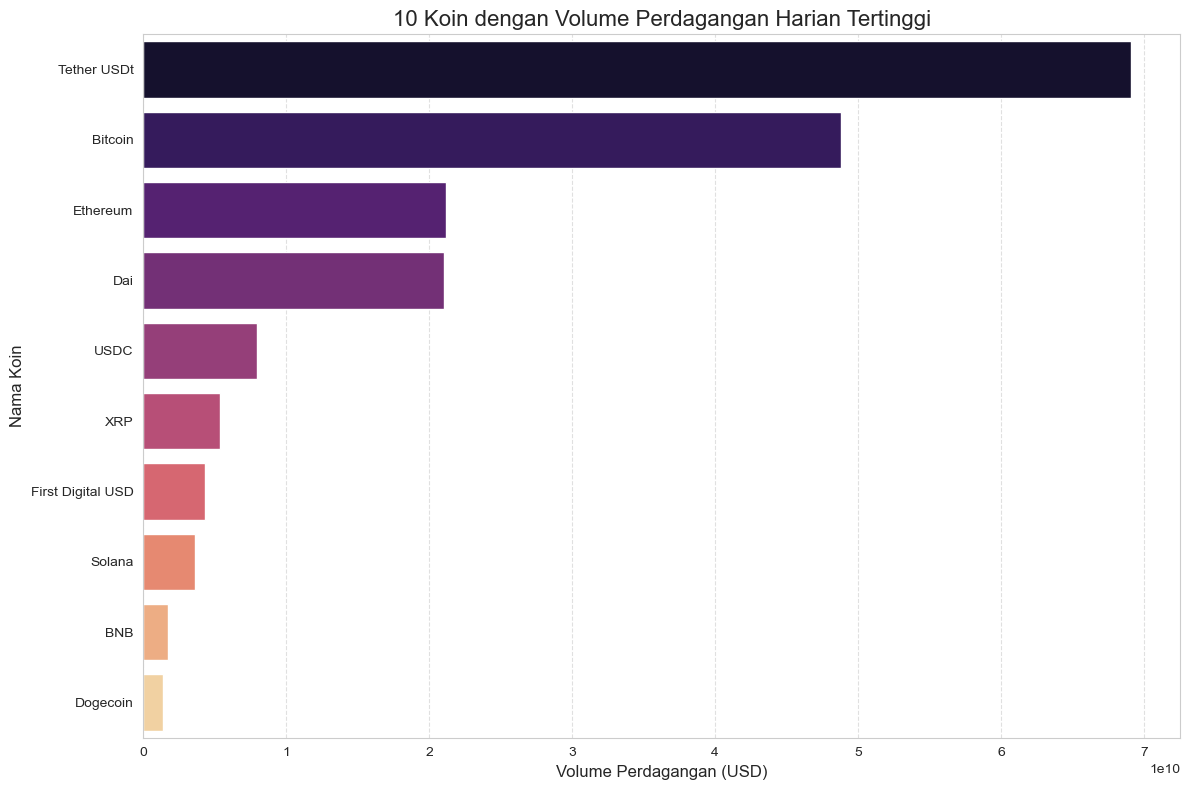

In [6]:
print("\n--- ANALISIS 10 KOIN DENGAN VOLUME PERDAGANGAN 24 JAM TERTINGGI ---")

# Ambil data terbaru per koin
if 'timestamp_utc+0' in dataFrame.columns:
    latest_data = dataFrame.loc[dataFrame.groupby('id')['timestamp_utc+0'].idxmax()].copy()
else:
    latest_data = dataFrame.copy()

# Urutkan berdasarkan volume_24h dan ambil 10 teratas
top_volume_coins = latest_data.sort_values(by='volume_24h', ascending=False).head(10).copy()

print("\nVolume perdagangan yang tinggi seringkali menjadi indikator bahwa suatu koin sedang 'panas' atau banyak diperbincangkan di pasar. Hal ini menunjukkan minat dan aktivitas perdagangan yang tinggi.")
print("\nBerikut adalah 10 koin teratas berdasarkan volume perdagangan 24 jam:")
for index, row in top_volume_coins.iterrows():
    print(f"  - {row['name']} ({row['symbol']}): Volume ${row['volume_24h']:,}")

# Visualisasi bar chart untuk 10 koin dengan volume tertinggi
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_volume_coins,
    x='volume_24h',
    y='name',
    palette='magma', # Palet warna yang menarik
    orient='h'
)
plt.title('10 Koin dengan Volume Perdagangan Harian Tertinggi', fontsize=16)
plt.xlabel('Volume Perdagangan (USD)', fontsize=12)
plt.ylabel('Nama Koin', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



--- ANALISIS DISTRIBUSI KAPITALISASI PASAR ---

Berikut adalah jumlah koin di setiap kategori kapitalisasi pasar:
                Kategori  Jumlah Koin
         Big Cap (> $1B)           75
Medium Cap ($250M - $1B)           26


C:\Users\Asus\AppData\Local\Temp\ipykernel_13052\3437426649.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


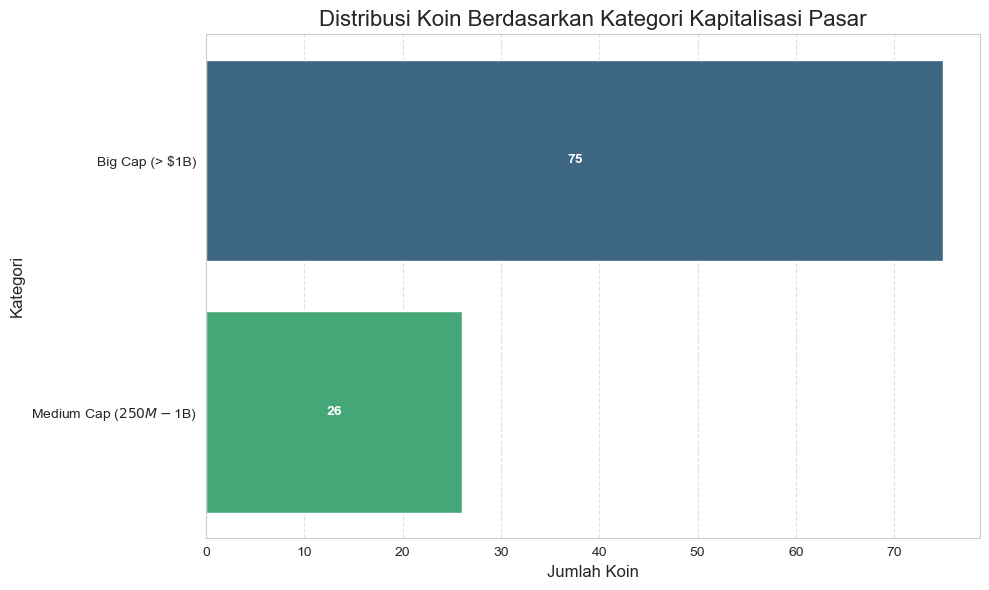

In [7]:
print("\n--- ANALISIS DISTRIBUSI KAPITALISASI PASAR ---")

# Pastikan kolom 'market_cap' ada
if 'market_cap' in latest_data.columns:
    # Definisikan kategori kapitalisasi pasar
    def categorize_market_cap(market_cap):
        if market_cap > 1_000_000_000:
            return 'Big Cap (> $1B)'
        elif 250_000_000 < market_cap <= 1_000_000_000:
            return 'Medium Cap ($250M - $1B)'
        else:
            return 'Small Cap (< $250M)'

    # Aplikasikan fungsi kategorisasi
    latest_data['market_cap_category'] = latest_data['market_cap'].apply(categorize_market_cap)

    print("\nBerikut adalah jumlah koin di setiap kategori kapitalisasi pasar:")
    category_counts = latest_data['market_cap_category'].value_counts().reset_index()
    category_counts.columns = ['Kategori', 'Jumlah Koin']
    print(category_counts.to_string(index=False))

    # Visualisasi bar chart untuk jumlah koin per kategori
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=category_counts,
        x='Jumlah Koin',
        y='Kategori',
        palette='viridis',
        orient='h'
    )
    plt.title('Distribusi Koin Berdasarkan Kategori Kapitalisasi Pasar', fontsize=16)
    plt.xlabel('Jumlah Koin', fontsize=12)
    plt.ylabel('Kategori', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Menambahkan nilai (count) di tengah bar
    for p in ax.patches:
        width = p.get_width()
        plt.text(
            width / 2, # x-position (centered)
            p.get_y() + p.get_height() / 2, # y-position (centered)
            '{:d}'.format(int(width)), # The text to display
            ha='center', # Horizontal alignment
            va='center', # Vertical alignment
            color='white', # Contrasting color
            fontweight='bold'
        )

    plt.tight_layout()
    plt.show()

else:
    print("Kolom 'market_cap' tidak ditemukan di DataFrame Anda. Analisis ini tidak dapat dijalankan.")



--- ANALISIS 10 KOIN DENGAN KAPITALISASI PASAR TERENDAH ---

Berikut adalah 10 koin dengan kapitalisasi pasar terendah:


C:\Users\Asus\AppData\Local\Temp\ipykernel_13052\165370153.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


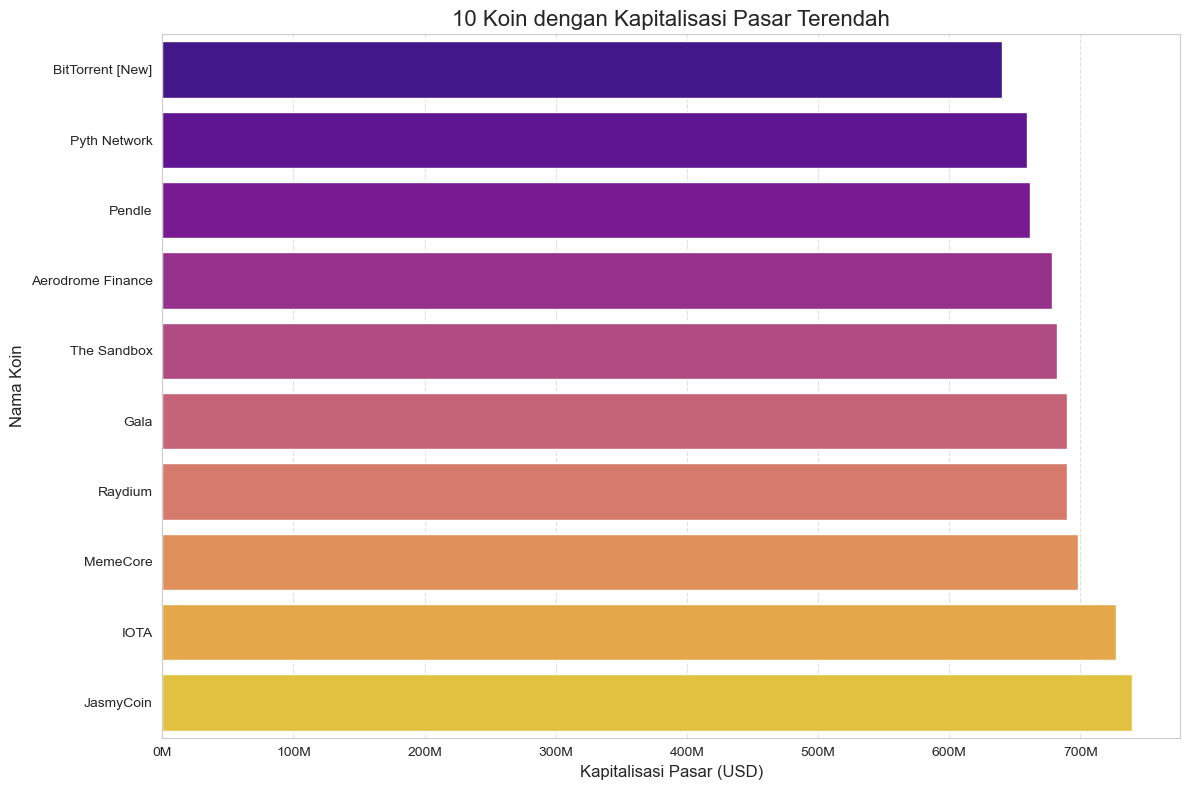

In [8]:
print("\n--- ANALISIS 10 KOIN DENGAN KAPITALISASI PASAR TERENDAH ---")

# Pastikan kolom 'market_cap' ada
if 'market_cap' in latest_data.columns:
    print("\nBerikut adalah 10 koin dengan kapitalisasi pasar terendah:")

    # Urutkan berdasarkan market_cap dan ambil 10 teratas
    lowest_market_cap_coins = latest_data.sort_values(by='market_cap', ascending=True).head(10).copy()

    # Visualisasi bar chart
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        data=lowest_market_cap_coins,
        x='market_cap',
        y='name',
        palette='plasma', # Palet warna yang menarik
        orient='h'
    )
    plt.title('10 Koin dengan Kapitalisasi Pasar Terendah', fontsize=16)

    # Memformat label sumbu x ke dalam satuan jutaan
    # Fungsi lambda ini mengubah nilai x menjadi string dengan format 'M' (Juta)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

    plt.xlabel('Kapitalisasi Pasar (USD)', fontsize=12)
    plt.ylabel('Nama Koin', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

else:
    print("Kolom 'market_cap' tidak ditemukan di DataFrame Anda. Analisis ini tidak dapat dijalankan.")
